# _Dataset cleaning : Users_

## . _Import Libraries_

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
import re
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

##  .  _Import Data_

In [4]:
users = pd.read_csv('users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


##  . _Data Exploring_

Explore and check the dataset, it is necessary to know your dataset before starting cleaning or 
dropping information.

In [5]:
# number of rows and columns
users.shape

(278858, 3)

In [6]:
# types of datas in each columns
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [7]:
users.info

<bound method DataFrame.info of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [8]:
# list of the column's names
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [9]:
# Looking for null datas
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

##  . _Data Cleaning_

### _Column title_

Clean the column name by removing the symbols, setting the names in the same format 
(lower case and replace space by _ etc...)

In [10]:
users.columns = [column.lower().replace('-', '_') for column in users.columns]

In [11]:
# Check the column 
list(users.columns)

['user_id', 'location', 'age']

In [12]:
#null data 
users.isna().sum()

user_id          0
location         0
age         110762
dtype: int64

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### _Location_

Extract data from column location in order to be able tuse later in EDA and machine learning.

In [14]:
users['city']=users['location'].str.split(',').str[0]
users['region']=users['location'].str.split(',').str[1]
users['country']=users['location'].str.split(',').str[2]
users

,user_id,location,age,city,region,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [15]:
users.country.describe()

count     278856
unique      1109
top          usa
freq      139187
Name: country, dtype: object

In [16]:
users['country'].value_counts(ascending=True)

 italy has no states or provinces         1
leyte                                     1
 ticino                                   1
 bruselas                                 1
 worcester                                1
                                      ...  
 spain                                13095
 germany                              17022
 united kingdom                       18286
 canada                               21558
 usa                                 139187
Name: country, Length: 1109, dtype: int64

In [32]:
users.country=users.country.astype(str)

In [33]:
users['country'].value_counts(dropna=False)

 usa                    139187
 canada                  21558
 united kingdom          18286
 germany                 17022
 spain                   13095
                         ...  
 trentino alto adige         1
 bavaria                     1
 nwfp                        1
 usa now                     1
 united kindgdom             1
Name: country, Length: 1110, dtype: int64

In [60]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    users['country'] = users['country'].str.replace(char, ' ')

In [83]:
users["country"].replace({"us": "usa", "united states": "usa"}, inplace=True)
print(users)

        user_id                            location   age         city  \
0             1                  nyc, new york, usa   NaN          nyc   
1             2           stockton, california, usa  18.0     stockton   
2             3     moscow, yukon territory, russia   NaN       moscow   
3             4           porto, v.n.gaia, portugal  17.0        porto   
4             5  farnborough, hants, united kingdom   NaN  farnborough   
...         ...                                 ...   ...          ...   
278853   278854               portland, oregon, usa   NaN     portland   
278854   278855  tacoma, washington, united kingdom  50.0       tacoma   
278855   278856           brampton, ontario, canada   NaN     brampton   
278856   278857           knoxville, tennessee, usa   NaN    knoxville   
278857   278858                dublin, n/a, ireland   NaN       dublin   

                  region          country        usa_clean  
0               new york              usa         

In [87]:
users['usa_clean'].value_counts()

 usa                    139187
 canada                  21558
 united kingdom          18286
 germany                 17022
 spain                   13095
                         ...  
 western cape                1
 whatcom                     1
 francisco morazan           1
 trentino alto adige         1
 united kindgdom             1
Name: usa_clean, Length: 1101, dtype: int64

In [57]:
users['country'].unique()

array([' usa', ' russia', ' portugal', ..., ' bkk', ' la svizzera',
       ' hernando'], dtype=object)

In [84]:
def usa_clean(x):
    if x.lower().startswith('us'):
        return 'usa'
    elif x.lower().startswith('united states'):
        return 'usa'
    elif x.lower().startswith('usa now'):
        return 'usa'
    elif x.lower().startswith('united sates'):
        return 'usa'
    elif x.lower().startswith('united staes'):
        return 'usa'
    elif x.lower().startswith('united sate'):
        return 'usa'
    elif x.lower().startswith('united states of america'):
        return 'usa'
    elif x.lower().startswith('u.s of a.'):
        return 'usa'
    elif x.lower().startswith('u.s of a.>'):
        return 'usa'
    elif x.lower().startswith('u.s.a.>'):
        return 'usa'
    elif x.lower().startswith('u.s>'):
        return 'usa'
    elif x.lower().startswith('us"'):
        return 'usa'
    else:
        return x
users['country'] = users['country'].apply(usa_clean)

In [74]:
def clean_uk(x):
    if str(x).lower().startswith('uk'):
        return 'united kingdom'
    elif str(x).lower().startswith('united kingdon'):
        return 'united kingdom'
    else:
        return x

In [75]:
users

,user_id,location,age,city,region,country,usa_clean
0,1,"nyc, new york, usa",NaN,nyc,new york,usa,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,united kingdom
...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa,usa


In [36]:
def canada_clean(x):
    if x.lower().startswith('c'):
        return 'canada'
    elif x.lower().startswith('ca.'):
        return 'canada'
    elif x.lower().startswith('ca'):
        return 'canada'
    else:
        return x

In [76]:
users['country'].value_counts()

 usa                    139187
 canada                  21558
 united kingdom          18286
 germany                 17022
 spain                   13095
                         ...  
 western cape                1
 whatcom                     1
 francisco morazan           1
 trentino alto adige         1
 united kindgdom             1
Name: country, Length: 1101, dtype: int64

In [85]:
users['usa_clean'] = users['country'].apply(usa_clean)

In [86]:
users.country.describe()

count     278858
unique      1101
top          usa
freq      139187
Name: country, dtype: object

In [81]:
users.loc[users.country == 'germany',:]

,user_id,location,age,city,region,country,usa_clean


In [82]:
users.loc[(users.country == 'fairyland') | (users.country == '5057chadwick ct.'),:]

,user_id,location,age,city,region,country,usa_clean


processing using text processing models.

### _Age_

The age column has some invalid entries like nan, 0 and very high values like 100 and above.

<AxesSubplot:>

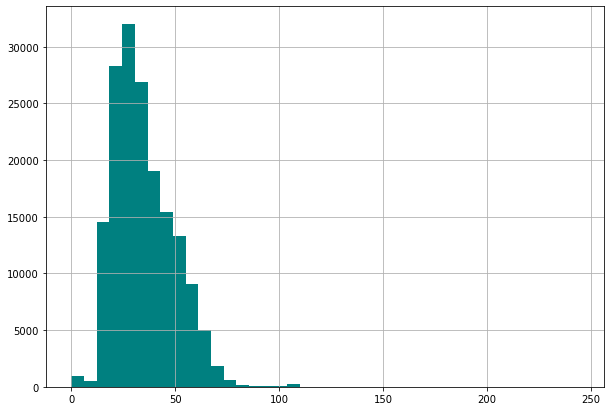

In [19]:
plt.figure(figsize=(10, 7))
users.age.hist(bins=40, color='teal')

Values below 5 and above 90 are not necessary in this case, so I am replacing them by NaNs.(replacing NaNs with mean, and then setting as int).

In [20]:
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan
users.age = users.age.fillna(users.age.mean())
users.age = users.age.astype(np.int32)

<AxesSubplot:>

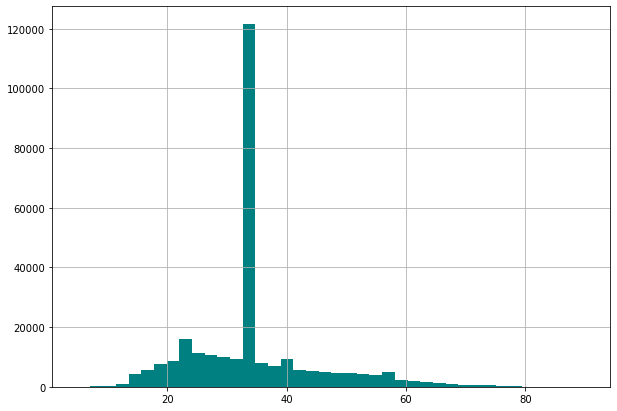

In [21]:
plt.figure(figsize=(10, 7))
users.age.hist(bins=40, color='teal')

<AxesSubplot:xlabel='age'>

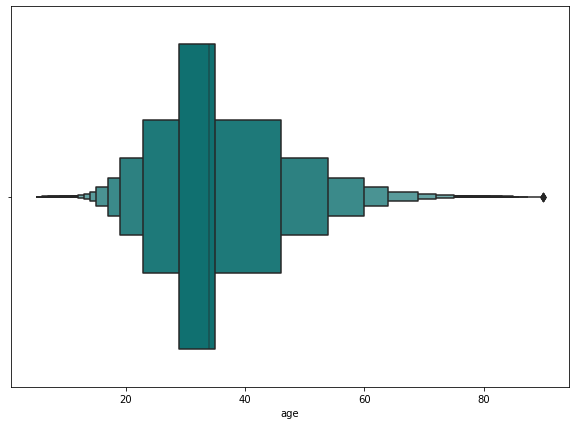

In [22]:
plt.figure(figsize=(10, 7))
sns.boxenplot(users.age, color='teal')

### _Drop unnecessary column_

Drop column which are not required :

In [69]:
users_final = users.drop(['location'],axis=1)

# 5  . Save data

In [24]:
## Saving the new clean data set under 'users_final' as a new csv file.
users.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\Working\users_final.csv')